# Klassifikation des Ziffern-Datensatzes

MNIST ist ein berühmter Datensatz im Machine Learning Umfeld.

Der Datensatz enthält Abbildungen von handgeschriebenen Ziffern: 10 Klassen, wobei sich jede Klasse auf eine Ziffer bezieht.

Von insgesamt 43 Personen trugen 30 zum Schulungssatz und weitere 13 zum Testsatz bei. 32x32 Bitmaps wurden in Blöcke von 4x4 aufgeteilt und die Anzahl der On-Pixel in jedem Block gezählt. Dies erzeugt eine Eingabematrix von 8x8, wobei jedes Element eine ganze Zahl im Bereich 0..16 ist. Dies reduziert die Dimensionalität und sorgt für Invarianz bei kleinen Verzerrungen.

Pro Ziffer gibt es ungefähr 180 Samples.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Ein Beispiel-Image aus dem Datensatz

<Figure size 432x288 with 0 Axes>

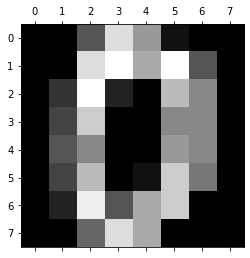

In [5]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

Die Images sind als Vektor(64) entsprechend eines 8x8 Bildes mit 16 Graustufen abgelegt.

Wir werden jetzt die vorhandenen Labels ignorieren und versuchen den Datensatz über k-Means in 10 Klassen zu teilen.

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

Das Ergebnis sind 10 Cluster in $\mathbb{R}^{64}$.
Die Cluster-Mittelpunkte sind Punkte im 64-dimensionalen Raum und quasi die "idealen" Ziffern.

Die schauen wir uns jetzt an:

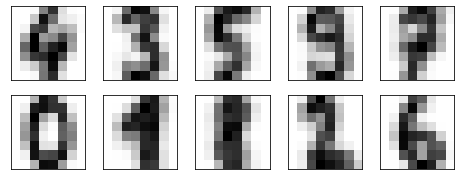

In [6]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Sieht ja gar nicht schlecht aus. Aber wir können das nachprüfen.

## Fehlerabschätzung
Wir vergleichen jetzt die Clusterzugehörigkeit mit dem echten
Label aus dem Datensatz:

Dazu matchen wir zunächst die Clusterzugehörigkeit mit dem echten Label `digits.target`, dazu
werden wir aus einem Array mit dem Cluster-Index ein Array mit der eigentlichen Ziffer machen: 

In [7]:
from scipy.stats import mode
import numpy as np

# erzeuge ein Array von Nullen in der selben Form wie unsere k-Means Cluster
labels = np.zeros_like(clusters)

# hier nutzen wir
for i in range(10):
    # erzeuge Boolsches Array zum Filtern
    mask = (clusters == i)
    # und nutzen dieses um die entsprechenden Array-Elemente zu selektieren
    # Wir gehen davon aus, dass die am häufigsten auftretende Ziffer die "echte" Ziffer des Clusters ist
    labels[mask] = mode(digits.target[mask])[0]

print(labels, digits.target)

[0 8 8 ... 8 9 9] [0 1 2 ... 8 9 8]


und erzeugen den Accuracy Score:

> **Accuracy Score:** Prozentsatz der richtigen Vorhersagen

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

knapp 80% Treffer!

Über die Confusion-Matrix können wir noch prüfen, wo die meisten Fehler entstanden sind:

> **Confusion Matrix:**  $C_{i,j}$ ist gleich der Anzahl der Beobachtungen, von denen bekannt ist, dass sie in der Gruppe $i$ sind, und von denen vorhergesagt wird, dass sie in der Gruppe $j$ sind.

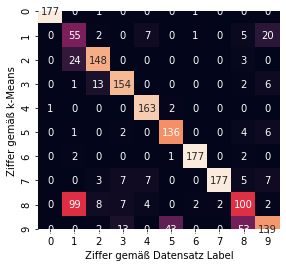

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('Ziffer gemäß Datensatz Label')
plt.ylabel('Ziffer gemäß k-Means');

Die Ziffer "1" ist schwierig - sie wird oft als "1" klassifiziert, die "5" oft als "9".

"0", "6" und "7" sind fast perfekt erkannt.